In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import conda_installer
# import matplotlib.pyplot as plt
# conda_installer.install()
# conda_installer.install()
# !/root/miniconda/bin/conda info -e
from rdkit import Chem
from deepchem.feat.graph_features import atom_features as get_atom_features
import rdkit

In [5]:
PDBs = {}

In [6]:
df_all = pd.DataFrame({'Id': [], 'TS_comp': [], 'TS_host': [], 'TS_ligand': []})

# cb7_gilson_feprocess

# CSV

In [7]:
df_com = pd.read_csv('../../Datasets/VM2_data/cb7_gilson_feprocess/cb7_feprocess_complex.csv')
df_lig = pd.read_csv('../../Datasets/VM2_data/cb7_gilson_feprocess/feprocess_ligand.csv')
df_hos = pd.read_csv('../../Datasets/VM2_data/cb7_gilson_feprocess/cb7_feprocess_host.csv')
comp_arr = df_com[' S'].to_numpy()
lig_arr = df_lig[' S'].to_numpy()
hos_arr = df_hos[' S'].to_list()*29
Ids = ['gilson_' + df_com.iloc[i][' Ident'] for i in range(len(comp_arr))]

df_cb7_gilson = pd.DataFrame({'Id': Ids, 'TS_comp': comp_arr, 'TS_host': hos_arr, 'TS_ligand': lig_arr})
df_all = pd.concat([df_all, df_cb7_gilson], ignore_index=True)

In [8]:
path = '../../Datasets/VM2_data/cb7_gilson_feprocess/'
host_pdb = Chem.SDMolSupplier(path + 'hosts/cb7.sdf')[0]
ligands_pdb = Chem.SDMolSupplier(path + 'ligands/cb7_ligands.sdf')
PDBs_cb7_gilson = {'gilson_cb7--guest%d' % (i + 1): Chem.CombineMols(host_pdb, ligands_pdb[i]) for i in range(29)}
PDBs.update(PDBs_cb7_gilson)

# cd_mobley_set2

In [9]:
df_com = pd.read_csv('../../Datasets/VM2_data/cd_mobley_set2/b-cyclodex_feprocess_complex.csv')
df_lig = pd.read_csv('../../Datasets/VM2_data/cd_mobley_set2/feprocess_ligand.csv')
df_hos = pd.read_csv('../../Datasets/VM2_data/cd_mobley_set2/b-cyclodex_feprocess_host.csv')
comp_arr = df_com[' S'].to_numpy()
lig_arr = df_lig[' S'].to_numpy()
hos_arr = df_hos[' S'].to_list()*21
Ids = ['mobley_set2_' + df_com.iloc[i][' Ident'] for i in range(len(comp_arr))]

df_mobley_set2 = pd.DataFrame({'Id': Ids, 'TS_comp': comp_arr, 'TS_host': hos_arr, 'TS_ligand': lig_arr})
df_all = pd.concat([df_all, df_mobley_set2], ignore_index=True)

In [10]:
path = '../../Datasets/VM2_data/cd_mobley_set2/'
host_pdb = Chem.SDMolSupplier(path + 'hosts/b-cyclodex.sdf')[0]
ligands_pdb = Chem.SDMolSupplier(path + 'ligands/cdset2_ligands.sdf')
PDBs_cdset2 = {'mobley_set2_b-cyclodex--guest-%d' % (i + 1) if i < 12 else 'mobley_set2_b-cyclodex--guest-s%d' % (i + 1): Chem.CombineMols(host_pdb, ligands_pdb[i]) for i in range(21)}
PDBs.update(PDBs_cdset2)

# Sampl3_h1_and_2_feprocess

In [11]:
df_com = pd.read_csv('../../Datasets/VM2_data/Sampl3_h1_and_2_feprocess/host2_host3_feprocess_complex.csv')
df_lig = pd.read_csv('../../Datasets/VM2_data/Sampl3_h1_and_2_feprocess/feprocess_ligand.csv')
df_hos = pd.read_csv('../../Datasets/VM2_data/Sampl3_h1_and_2_feprocess/host2_host3_feprocess_host.csv')
comp_arr = df_com[' S'].to_numpy()
lig_arr = df_lig[' S'].to_list()*2
hos_arr = [df_hos[' S'].to_list()[0]]*2 + [df_hos[' S'].to_list()[1]]*2
Ids = ['Sampl3_h1_and_2_' + df_com.iloc[i][' Ident'] for i in range(len(comp_arr))]

df_Sampl3_h1_and_2 = pd.DataFrame({'Id': Ids, 'TS_comp': comp_arr, 'TS_host': hos_arr, 'TS_ligand': lig_arr})
df_all = pd.concat([df_all, df_Sampl3_h1_and_2], ignore_index=True)

In [12]:
path = '../../Datasets/VM2_data/Sampl3_h1_and_2_feprocess/'
host2 = Chem.MolFromMolFile(path + 'hosts/host2.mol')
host3 = Chem.MolFromMolFile(path + 'hosts/host3.mol')
guest8 = Chem.MolFromMolFile(path + 'ligands/guest8.mol')
guest9 = Chem.MolFromMolFile(path + 'ligands/guest9.mol')
PDBs.update({
    'Sampl3_h1_and_2_host2--guest8': Chem.CombineMols(host2, guest8),
    'Sampl3_h1_and_2_host2--guest9': Chem.CombineMols(host2, guest9),
    'Sampl3_h1_and_2_host3--guest8': Chem.CombineMols(host3, guest8),
    'Sampl3_h1_and_2_host3--guest9': Chem.CombineMols(host3, guest9),
})

# Sampl6_OA_feprocess

In [13]:
df_com = pd.read_csv('../../Datasets/VM2_data/Sampl6_OA_feprocess/OA_TEMOA_feprocess_complex.csv')
df_lig = pd.read_csv('../../Datasets/VM2_data/Sampl6_OA_feprocess/feprocess_ligand.csv')
df_hos = pd.read_csv('../../Datasets/VM2_data/Sampl6_OA_feprocess/OA_TEMOA_feprocess_host.csv')
comp_arr = df_com[' S'].to_numpy()
lig_arr = df_lig[' S'].to_list()*2
hos_arr = [df_hos[' S'].to_list()[0]]*8 + [df_hos[' S'].to_list()[1]]*8
Ids = ['Sampl6_OA_' + df_com.iloc[i][' Ident'] for i in range(len(comp_arr))]

df_Sampl6_OA_feprocess = pd.DataFrame({'Id': Ids, 'TS_comp': comp_arr, 'TS_host': hos_arr, 'TS_ligand': lig_arr})
df_all = pd.concat([df_all, df_Sampl6_OA_feprocess], ignore_index=True)

In [14]:
path = '../../Datasets/VM2_data/Sampl6_OA_feprocess/'
host_oa = Chem.MolFromMolFile(path + 'hosts/OA.mol')
host_temoa = Chem.MolFromMolFile(path + 'hosts/TEMOA.mol')
ligands = Chem.SDMolSupplier(path + 'ligands/oa_ligands.sdf.save')
PDBs_oa = {'Sampl6_OA_OA--OA-G%d'%i: Chem.CombineMols(host_oa, ligands[i]) for i in range(8)}
PDBs_temoa = {'Sampl6_OA_TEMOA--OA-G%d'%i: Chem.CombineMols(host_temoa, ligands[i]) for i in range(8)}
PDBs.update(PDBs_oa)
PDBs.update(PDBs_temoa)

# Sampl6_cb8_feprocess

In [15]:
df_com = pd.read_csv('../../Datasets/VM2_data/Sampl6_cb8_feprocess/CB8_feprocess_complex.csv')
df_lig = pd.read_csv('../../Datasets/VM2_data/Sampl6_cb8_feprocess/feprocess_ligand.csv')
df_hos = pd.read_csv('../../Datasets/VM2_data/Sampl6_cb8_feprocess/CB8_feprocess_host.csv')
comp_arr = df_com[' S'].to_numpy()
lig_arr = df_lig[' S'].to_numpy()
hos_arr = df_hos[' S'].to_list()*11
Ids = ['Sampl6_cb8_' + df_com.iloc[i][' Ident'] for i in range(len(comp_arr))]

df_Sampl6_cb8_feprocess = pd.DataFrame({'Id': Ids, 'TS_comp': comp_arr, 'TS_host': hos_arr, 'TS_ligand': lig_arr})
df_all = pd.concat([df_all, df_Sampl6_cb8_feprocess], ignore_index=True)

In [16]:
path = '../../Datasets/VM2_data/Sampl6_cb8_feprocess/'
host = Chem.SDMolSupplier(path + 'hosts/CB8.sdf')[0]
ligands = [Chem.MolFromMol2File(path + 'ligands/' + f) for f in os.listdir(path + 'ligands') if f.__contains__('mol2')]
PDBs_Sampl6_cb8 = {'Sampl6_cb8_CB8--CB8-G%d'%i: Chem.CombineMols(host, ligands[i]) for i in range(11)}
PDBs.update(PDBs_Sampl6_cb8)

In [17]:
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest1')[0][0], ['exp']] = -0.9
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest2')[0][0], ['exp']] = -0.4
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest3')[0][0], ['exp']] = -0.1
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest4')[0][0], ['exp']] = 0.6
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest5')[0][0], ['exp']] = 0.0
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest6')[0][0], ['exp']] = -0.1
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest7')[0][0], ['exp']] = -1.2
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest8')[0][0], ['exp']] = -0.7
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest9')[0][0], ['exp']] = 0.4
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest10')[0][0], ['exp']] = -0.5
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest11')[0][0], ['exp']] = -0.7
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest12')[0][0], ['exp']] = -1.7
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest13')[0][0], ['exp']] = 0.4
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest14')[0][0], ['exp']] = -0.3
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest15')[0][0], ['exp']] = -0.3
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest16')[0][0], ['exp']] = 0.9
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest17')[0][0], ['exp']] = -0.8
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest18')[0][0], ['exp']] = -0.4
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest19')[0][0], ['exp']] = -0.5
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest19')[0][0], ['exp']] = -0.5
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest20')[0][0], ['exp']] = 0.4
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest21')[0][0], ['exp']] = -0.6
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest22')[0][0], ['exp']] = -0.1
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest23')[0][0], ['exp']] = -0.8
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest24')[0][0], ['exp']] = -0.8
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest25')[0][0], ['exp']] = 0.0
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest26')[0][0], ['exp']] = -0.2
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest27')[0][0], ['exp']] = -0.6
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest28')[0][0], ['exp']] = 0.2
df_all.loc[np.where(df_all['Id'] == 'gilson_cb7--guest29')[0][0], ['exp']] = -0.2
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-1')[0][0], ['exp']] = -3.086
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-2')[0][0], ['exp']] = -3.105
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-3')[0][0], ['exp']] = -1.96
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-4')[0][0], ['exp']] = -2.371
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-5')[0][0], ['exp']] = -1.6
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-6')[0][0], ['exp']] = -3.157
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-7')[0][0], ['exp']] = -3.814
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-8')[0][0], ['exp']] = -0.87
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-9')[0][0], ['exp']] = 0.093
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-10')[0][0], ['exp']] = 0.698
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-11')[0][0], ['exp']] = -0.552
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-12')[0][0], ['exp']] = -0.779
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s13')[0][0], ['exp']] = -3.027
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s14')[0][0], ['exp']] = -2.434
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s15')[0][0], ['exp']] = -1.885
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s16')[0][0], ['exp']] = -2.049
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s17')[0][0], ['exp']] = -1.051
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s18')[0][0], ['exp']] = -3.59
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s19')[0][0], ['exp']] = 1.292
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s20')[0][0], ['exp']] = 0.774
df_all.loc[np.where(df_all['Id'] == 'mobley_set2_b-cyclodex--guest-s21')[0][0], ['exp']] = -1.268
df_all.loc[np.where(df_all['Id'] == 'Sampl3_h1_and_2_host2--guest8')[0][0], ['exp']] = 2.38
df_all.loc[np.where(df_all['Id'] == 'Sampl3_h1_and_2_host2--guest9')[0][0], ['exp']] = -3.63
df_all.loc[np.where(df_all['Id'] == 'Sampl3_h1_and_2_host3--guest8')[0][0], ['exp']] = -2.4
df_all.loc[np.where(df_all['Id'] == 'Sampl3_h1_and_2_host3--guest9')[0][0], ['exp']] = -4.79
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G0')[0][0], ['exp']] = -0.8
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G1')[0][0], ['exp']] = 0.9
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G2')[0][0], ['exp']] = 3.7
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G3')[0][0], ['exp']] = 2.4
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G4')[0][0], ['exp']] = -0.2
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G5')[0][0], ['exp']] = 0.7
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G6')[0][0], ['exp']] = 0.3
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_OA--OA-G7')[0][0], ['exp']] = 1.2
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G0')[0][0], ['exp']] = 1.8
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G1')[0][0], ['exp']] = 2.3
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G2')[0][0], ['exp']] = 2.5
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G3')[0][0], ['exp']] = 3.2
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G4')[0][0], ['exp']] = 1.1
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G5')[0][0], ['exp']] = 3.8
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G6')[0][0], ['exp']] = 0.8
df_all.loc[np.where(df_all['Id'] == 'Sampl6_OA_TEMOA--OA-G7')[0][0], ['exp']] = 4.2
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G0')[0][0], ['exp']] = -2.5
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G1')[0][0], ['exp']] = -2.6
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G2')[0][0], ['exp']] = -1.2
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G3')[0][0], ['exp']] = -4.0
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G4')[0][0], ['exp']] = 2.0
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G5')[0][0], ['exp']] = -5.0
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G6')[0][0], ['exp']] = -2.6
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G7')[0][0], ['exp']] = -3.5
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G8')[0][0], ['exp']] = 0.9
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G9')[0][0], ['exp']] = -4.0
df_all.loc[np.where(df_all['Id'] == 'Sampl6_cb8_CB8--CB8-G10')[0][0], ['exp']] = -5.7

In [18]:
df = df_all.dropna()

In [21]:
exp_res = df_all['exp'].to_numpy()
nm_res = (- df_all['TS_comp'] + df_all['TS_host'] + df_all['TS_ligand']).to_numpy()

In [22]:
np.sqrt((exp_res - nm_res)**2).mean()

12.007159554106174

In [144]:
from dcFeaturizer import atom_features as get_atom_features
def featurize(molecule, info):
    
    atom_features = []
    for atom in molecule.GetAtoms():
        new_feature = get_atom_features(atom).tolist()
        position = molecule.GetConformer().GetAtomPosition(atom.GetIdx())
        new_feature += [atom.GetMass(), atom.GetAtomicNum()]
        new_feature += [position.x, position.y, position.z]
        for neighbor in atom.GetNeighbors()[:2]:
            neighbor_idx = neighbor.GetIdx()
            new_feature += [neighbor_idx]
        for i in range(2 - len(atom.GetNeighbors())):
            new_feature += [-1]
        atom_features.append(np.concatenate([new_feature, info], 0))
    return np.array(atom_features)

In [140]:
X_train, X_test, y_train, y_test = X[:int(.8*len(X))], X[int(.8*len(X)):], y[:int(.8*len(X))], y[int(.8*len(X)):]
info_train, info_test = info[:int(.8*len(X))], info[int(.8*len(X)):]

In [206]:
info = []
for pdb in list(PDBs.keys()):
    info.append(df[df['Id'] == pdb][['TS_comp', 'TS_host', 'TS_ligand']].to_numpy()[0])
X = []
y = []
for i, pdb in enumerate(list(PDBs.keys())):
    X.append(featurize(PDBs[pdb], info[i]))
    y.append(df[df['Id'] == pdb]['exp'].to_numpy()[0])

In [152]:
sample_x_atoms = X[:10]
for i in range(len(sample_x_atoms)):
    if sample_x_atoms[i].shape[0] < 2000:
        new_list = sample_x_atoms[i].tolist()
        for j in range(2000 - sample_x_atoms[i].shape[0]):
            new_list.append([0.0]*41)
#         new_list.append(np.concatenate((info[i], [0]*65)))
        sample_x_atoms[i] = np.array(new_list)
sample_x_atoms = np.array(sample_x_atoms)

In [154]:
sample_x_atoms.shape

(10, 2000, 41)

In [125]:
%cd PGGCN

C:\Users\arisheh\PycharmProjects\GBNN\PGGCN


In [146]:
physics_info = []
for i in range(len(X_train)):
    physics_info.append(X_train[i][0][38:])

In [172]:
X_train[32]

(2000, 41)

In [171]:
input_shapes[32]

85

In [182]:
X_train.shape

(64, 2000, 41)

In [207]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [209]:
import layers_update_mobley as layers
import importlib
# import tensorflow_addons as tfa
importlib.reload(layers)


class PGGCNModel(tf.keras.Model):
    def __init__(self, num_atom_features = 36, r_out_channel = 20, c_out_channel = 128):
        super().__init__()
        self.ruleGraphConvLayer = layers.RuleGraphConvLayer(r_out_channel, num_atom_features, 0)
        self.ruleGraphConvLayer.combination_rules = []
        self.conv = layers.ConvLayer(c_out_channel)
        self.dense1 = tf.keras.layers.Dense(64, activation='relu', name='dense1')
#         self.dense2 = tf.keras.layers.Dense(32, activation='sigmoid')
#         self.dense3 = tf.keras.layers.Dense(100, activation='relu')
#         self.dense4 = tf.keras.layers.Dense(80, activation='relu')
        self.dense5 = tf.keras.layers.Dense(16, name='relu')
        self.dense6 = tf.keras.layers.Dense(1, name='dense6')
        self.dense7 = tf.keras.layers.Dense(1, name='dense7',
                 kernel_initializer=tf.keras.initializers.Constant([-.2, -1, 1, 1]),
                 bias_initializer=tf.keras.initializers.Zeros())
        self.all_layer_1_weights = []
        
    def addRule(self, rule, start_index, end_index = None):
        self.ruleGraphConvLayer.addRule(rule, start_index, end_index)
    
    def set_input_shapes(self, i_s):
        self.i_s = i_s

    def call(self, inputs):
        physics_info = inputs[:,0,38:]
        x_a = []
        for i in range(len(self.i_s)):
            x_a.append(inputs[i][:self.i_s[i], :38])
#         agg = []
#         for i in range(len(x_a)):
#             agg.append([x_a[i], self.a_l[i]])
        x = self.ruleGraphConvLayer(x_a)
        self.all_layer_1_weights.append(self.ruleGraphConvLayer.w_s)
        x = self.conv(x)
        x = self.dense1(x)
#         x = self.dense2(x)
#         x = self.dense3(x)
#         x = self.dense4(x)
        x = self.dense5(x)
        model_var = self.dense6(x)
        merged = tf.concat([model_var, physics_info], axis=1)
        out = self.dense7(merged)
        return out

m = PGGCNModel()
m.addRule("sum", 0, 31)
m.addRule("multiply", 31, 33)
m.addRule("distance", 33, 36)

import keras.backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred[0] - y_true))) + K.abs(1 / K.mean(.2 + y_pred[1]))
def pure_rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
    

# optimizers = [
#     tf.keras.optimizers.Adam(learning_rate=0.1),
#     tf.keras.optimizers.Adam(learning_rate=0.005)
# ]
# optimizers_and_layers = [(optimizers[0], m.layers[:len(m.layers) - 1]), 
#                          (optimizers[1], m.layers[len(m.layers) - 1])]    
# optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

# opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
m.compile(loss=pure_rmse, optimizer='adam')#opt)
X_train, X_test, y_train, y_test = X[:int(.8*len(X))], X[int(.8*len(X)):], y[:int(.8*len(X))], y[int(.8*len(X)):]
info_train, info_test = info[:int(.8*len(X))], info[int(.8*len(X)):]

input_shapes = []
for i in range(len(X_train)):
    input_shapes.append(np.array(X_train[i]).shape[0])
m.set_input_shapes(input_shapes)
for i in range(len(X_train)):
    if X_train[i].shape[0] < 2000:
        new_list = np.zeros([2000 - X_train[i].shape[0], 41])
        X_train[i] = np.concatenate([X_train[i], new_list], 0)
X_train = np.array(X_train)
y_train = np.array(y_train)
hist = m.fit(X_train, y_train, epochs = 20, batch_size=64)

Epoch 1/20
1/1 [==============================] - 112s 112s/step - loss: 51.4159
Epoch 2/20
1/1 [==============================] - 1s 551ms/step - loss: 40.1895
Epoch 3/20
1/1 [==============================] - 1s 782ms/step - loss: 29.8947
Epoch 4/20
1/1 [==============================] - 1s 823ms/step - loss: 20.0733
Epoch 5/20
1/1 [==============================] - 1s 710ms/step - loss: 10.5694
Epoch 6/20
1/1 [==============================] - 1s 785ms/step - loss: 3.9938
Epoch 7/20
1/1 [==============================] - 1s 957ms/step - loss: 8.8007
Epoch 8/20
1/1 [==============================] - 1s 733ms/step - loss: 13.4233
Epoch 9/20
1/1 [==============================] - 1s 695ms/step - loss: 15.3203
Epoch 10/20
1/1 [==============================] - 1s 807ms/step - loss: 14.8246
Epoch 11/20
1/1 [==============================] - 1s 724ms/step - loss: 13.3705
Epoch 12/20
1/1 [==============================] - 1s 845ms/step - loss: 10.5055
Epoch 13/20
1/1 [=====================

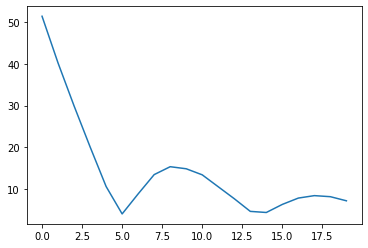

In [211]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])

In [198]:
m.predict(X_test)

(None, 2000, 41)


array([[114.11706 ],
       [113.69073 ],
       [112.69825 ],
       [112.9737  ],
       [113.586586],
       [113.34208 ],
       [106.58047 ],
       [107.82093 ],
       [112.5232  ],
       [108.93421 ],
       [104.92666 ],
       [114.16779 ],
       [110.83976 ],
       [111.63029 ],
       [108.10816 ],
       [112.228615],
       [113.33961 ]], dtype=float32)

In [210]:
input_shapes = []
y_test = y[int(.8*len(X)):]
for i in range(len(X_test)):
    input_shapes.append(np.array(X_test[i]).shape[0])
m.set_input_shapes(input_shapes)
for i in range(len(X_test)):
    if X_test[i].shape[0] < 2000:
        new_list = np.zeros([2000 - X_test[i].shape[0], 41])
#         for j in range(2000 - X_atoms[i].shape[0]):
#             new_list.append(np.zeros(53))
#         new_list.append(np.concatenate((info[i], [0]*65)))
        X_test[i] = np.concatenate([X_test[i], new_list], 0)
X_test = np.array(X_test)
y_test = np.array(y_test)
m.evaluate(X_test, y_test)

1/1 [==============================] - 14s 14s/step - loss: 5.3466


5.346636772155762